"The Adult dataset is from the Census Bureau and the task is to predict whether a given adult makes more than $50,000 a year based attributes such as education, hours of work per week, etc.."
The dataset was drawn from the 1994 United States Census Bureau data and is credited to Ronny Kohavi and Barry Becker. 


*   Target field: Income (The income is divide into two classes: <=50K and >50K )
*   A certain number of attributes (variables): These are the demographics and other features to describe a person

For more information regarding the dataset see [Adult income](https://archive.ics.uci.edu/ml/datasets/adult)


Code for importing the required packages (is given)

In [1]:
import os

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

from matplotlib import pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import Input, Model, layers, losses, optimizers, callbacks

The Url and column names of the dataset are given. Read this dataset into a pandas dataframe and store it as a csv file. 

In [2]:
# load the dataset
url_data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

column_names = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num','marital-status',
                'occupation', 'relationship', 'race', 'gender','capital-gain', 'capital-loss', 
                'hours-per-week', 'native-country','income']
df=pd.read_csv(url_data, names=column_names)
df.to_csv("adults_data.csv")

Provide a **description** of the dataset in pandas

In [8]:
# Describe the dataframe
df.describe(include="all")

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


Find out and print the unique values per column 

In [9]:
# Print out unique values per column
adults_data = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
for c in column_names:
    print(c, np.unique(adults_data[c].values))
#df.apply(lambda x: x.unique())

age [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 90]
workclass ['?' 'Federal-gov' 'Local-gov' 'Never-worked' 'Private' 'Self-emp-inc'
 'Self-emp-not-inc' 'State-gov' 'Without-pay']
fnlwgt [  12285   13769   14878 ... 1366120 1455435 1484705]
education ['10th' '11th' '12th' '1st-4th' '5th-6th' '7th-8th' '9th' 'Assoc-acdm'
 'Assoc-voc' 'Bachelors' 'Doctorate' 'HS-grad' 'Masters' 'Preschool'
 'Prof-school' 'Some-college']
educational-num [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
marital-status ['Divorced' 'Married-AF-spouse' 'Married-civ-spouse'
 'Married-spouse-absent' 'Never-married' 'Separated' 'Widowed']
occupation ['?' 'Adm-clerical' 'Armed-Forces' 'Craft-repair' 'Exec-managerial'
 'Farming-fishing' 'Handlers-cleaners' 'Machine-op-inspct' 'Other-service'
 'Priv-house-serv' 'Prof-specialty' 'Protective-se

Compare the columns 'education' and 'educational-num', drop the column 'education'.

In [16]:
for i in range(1, 17):
    print(adults_data[adults_data["educational-num"]==i]["education"].unique())

['Preschool']
['1st-4th']
['5th-6th']
['7th-8th']
['9th']
['10th']
['11th']
['12th']
['HS-grad']
['Some-college']
['Assoc-voc']
['Assoc-acdm']
['Bachelors']
['Masters']
['Prof-school']
['Doctorate']


In [20]:
print(df[["education", "educational-num"]])
df.drop(columns="educational-num", inplace=True)

         education  educational-num
0        Bachelors               13
1        Bachelors               13
2          HS-grad                9
3             11th                7
4        Bachelors               13
...            ...              ...
32556   Assoc-acdm               12
32557      HS-grad                9
32558      HS-grad                9
32559      HS-grad                9
32560      HS-grad                9

[32561 rows x 2 columns]


Remove whitespaces at the beginning and end of all attributes of type String and drop the rows containing '?'

In [18]:
adults_data.drop(adults_data[(adults_data["workclass"]=="?") | (adults_data["native-country"]=="?")].index, inplace=True)

In [19]:
adults_data.describe(include="all")

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,30169.000000,30169,3.016900e+04,30169,30169.000000,30169,30169,30169,30169,30169,30169.000000,30169.000000,30169.000000,30169,30169
unique,NaN,8,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22286,NaN,9841,NaN,14066,4038,12463,25938,20385,NaN,NaN,NaN,27511,22661
mean,38.433757,NaN,1.898022e+05,NaN,10.120687,NaN,NaN,NaN,NaN,NaN,1091.754483,88.351984,40.928337,NaN,NaN
std,13.136121,NaN,1.056532e+05,NaN,2.550235,NaN,NaN,NaN,NaN,NaN,7405.505862,404.253703,11.982022,NaN,NaN
min,17.000000,NaN,1.376900e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.176340e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.784290e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,2.376240e+05,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [21]:
# Drop rows containing '?'
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df = df.replace("?", np.nan) 
df = df.dropna()

Provide a **description** of your dataframe again. Did the number of rows reduce?

In [22]:
# A description of your dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   marital-status  30162 non-null  object
 5   occupation      30162 non-null  object
 6   relationship    30162 non-null  object
 7   race            30162 non-null  object
 8   gender          30162 non-null  object
 9   capital-gain    30162 non-null  int64 
 10  capital-loss    30162 non-null  int64 
 11  hours-per-week  30162 non-null  int64 
 12  native-country  30162 non-null  object
 13  income          30162 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


Make a new column with 'age-groups' and drop 'age'


In [23]:
# Make new column with 'age-groups' and drop 'age'
age_bins = [0, 18, 25, 35, 45, 55, 65, 100]
df['age-groups'] = pd.cut(df['age'], bins=age_bins, right=False)
df.drop(columns="age", inplace=True)

In [20]:
age_bins = [0, 18, 25, 35, 45, 55, 65, 100]
adults_data["age-groups"] = pd.cut(adults_data["age"], age_bins)
adults_data.drop("age", axis=1, inplace=True)
adults_data.drop("education", axis=1, inplace=True)

Print two lists containing:


*   Only numerical columns
*   Only Categorical columns




In [24]:
# get new columns, cat and num cols
num_cols = df.select_dtypes(include=[np.number]).columns.values.tolist()
cat_cols = df.select_dtypes(include=['category']).columns.values.tolist()

In [26]:
columns = adults_data.columns
num_cols = list(adults_data._get_numeric_data().columns)
cat_cols = list(np.setdiff1d(columns, num_cols))
print("Numerical columns: ", num_cols)
print("Categorical columns: ", cat_cols)
                

Numerical columns:  ['fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
Categorical columns:  ['age-groups', 'gender', 'income', 'marital-status', 'native-country', 'occupation', 'race', 'relationship', 'workclass']


Normalize all numerical columns

In [25]:
# Normalize all numerical columns

def normalize(col_name):
    df[col_name] = (df[col_name]-df[col_name].mean())/df[col_name].std()
    
for col in num_cols:
    normalize(col)

In [29]:
normalizers = {c: StandardScaler() for c in num_cols}
for c, Scaler in normalizers.items():
    adults_data[c] = Scaler.fit_transform(adults_data[c].to_numpy().astype("float").reshape((-1, 1)))    

Plot the column distributions (one plot for each column)
* Hint: lookup [Seaborn histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) for numerical columns
* Hint: lookup [Seaborn countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html) for categorical columns

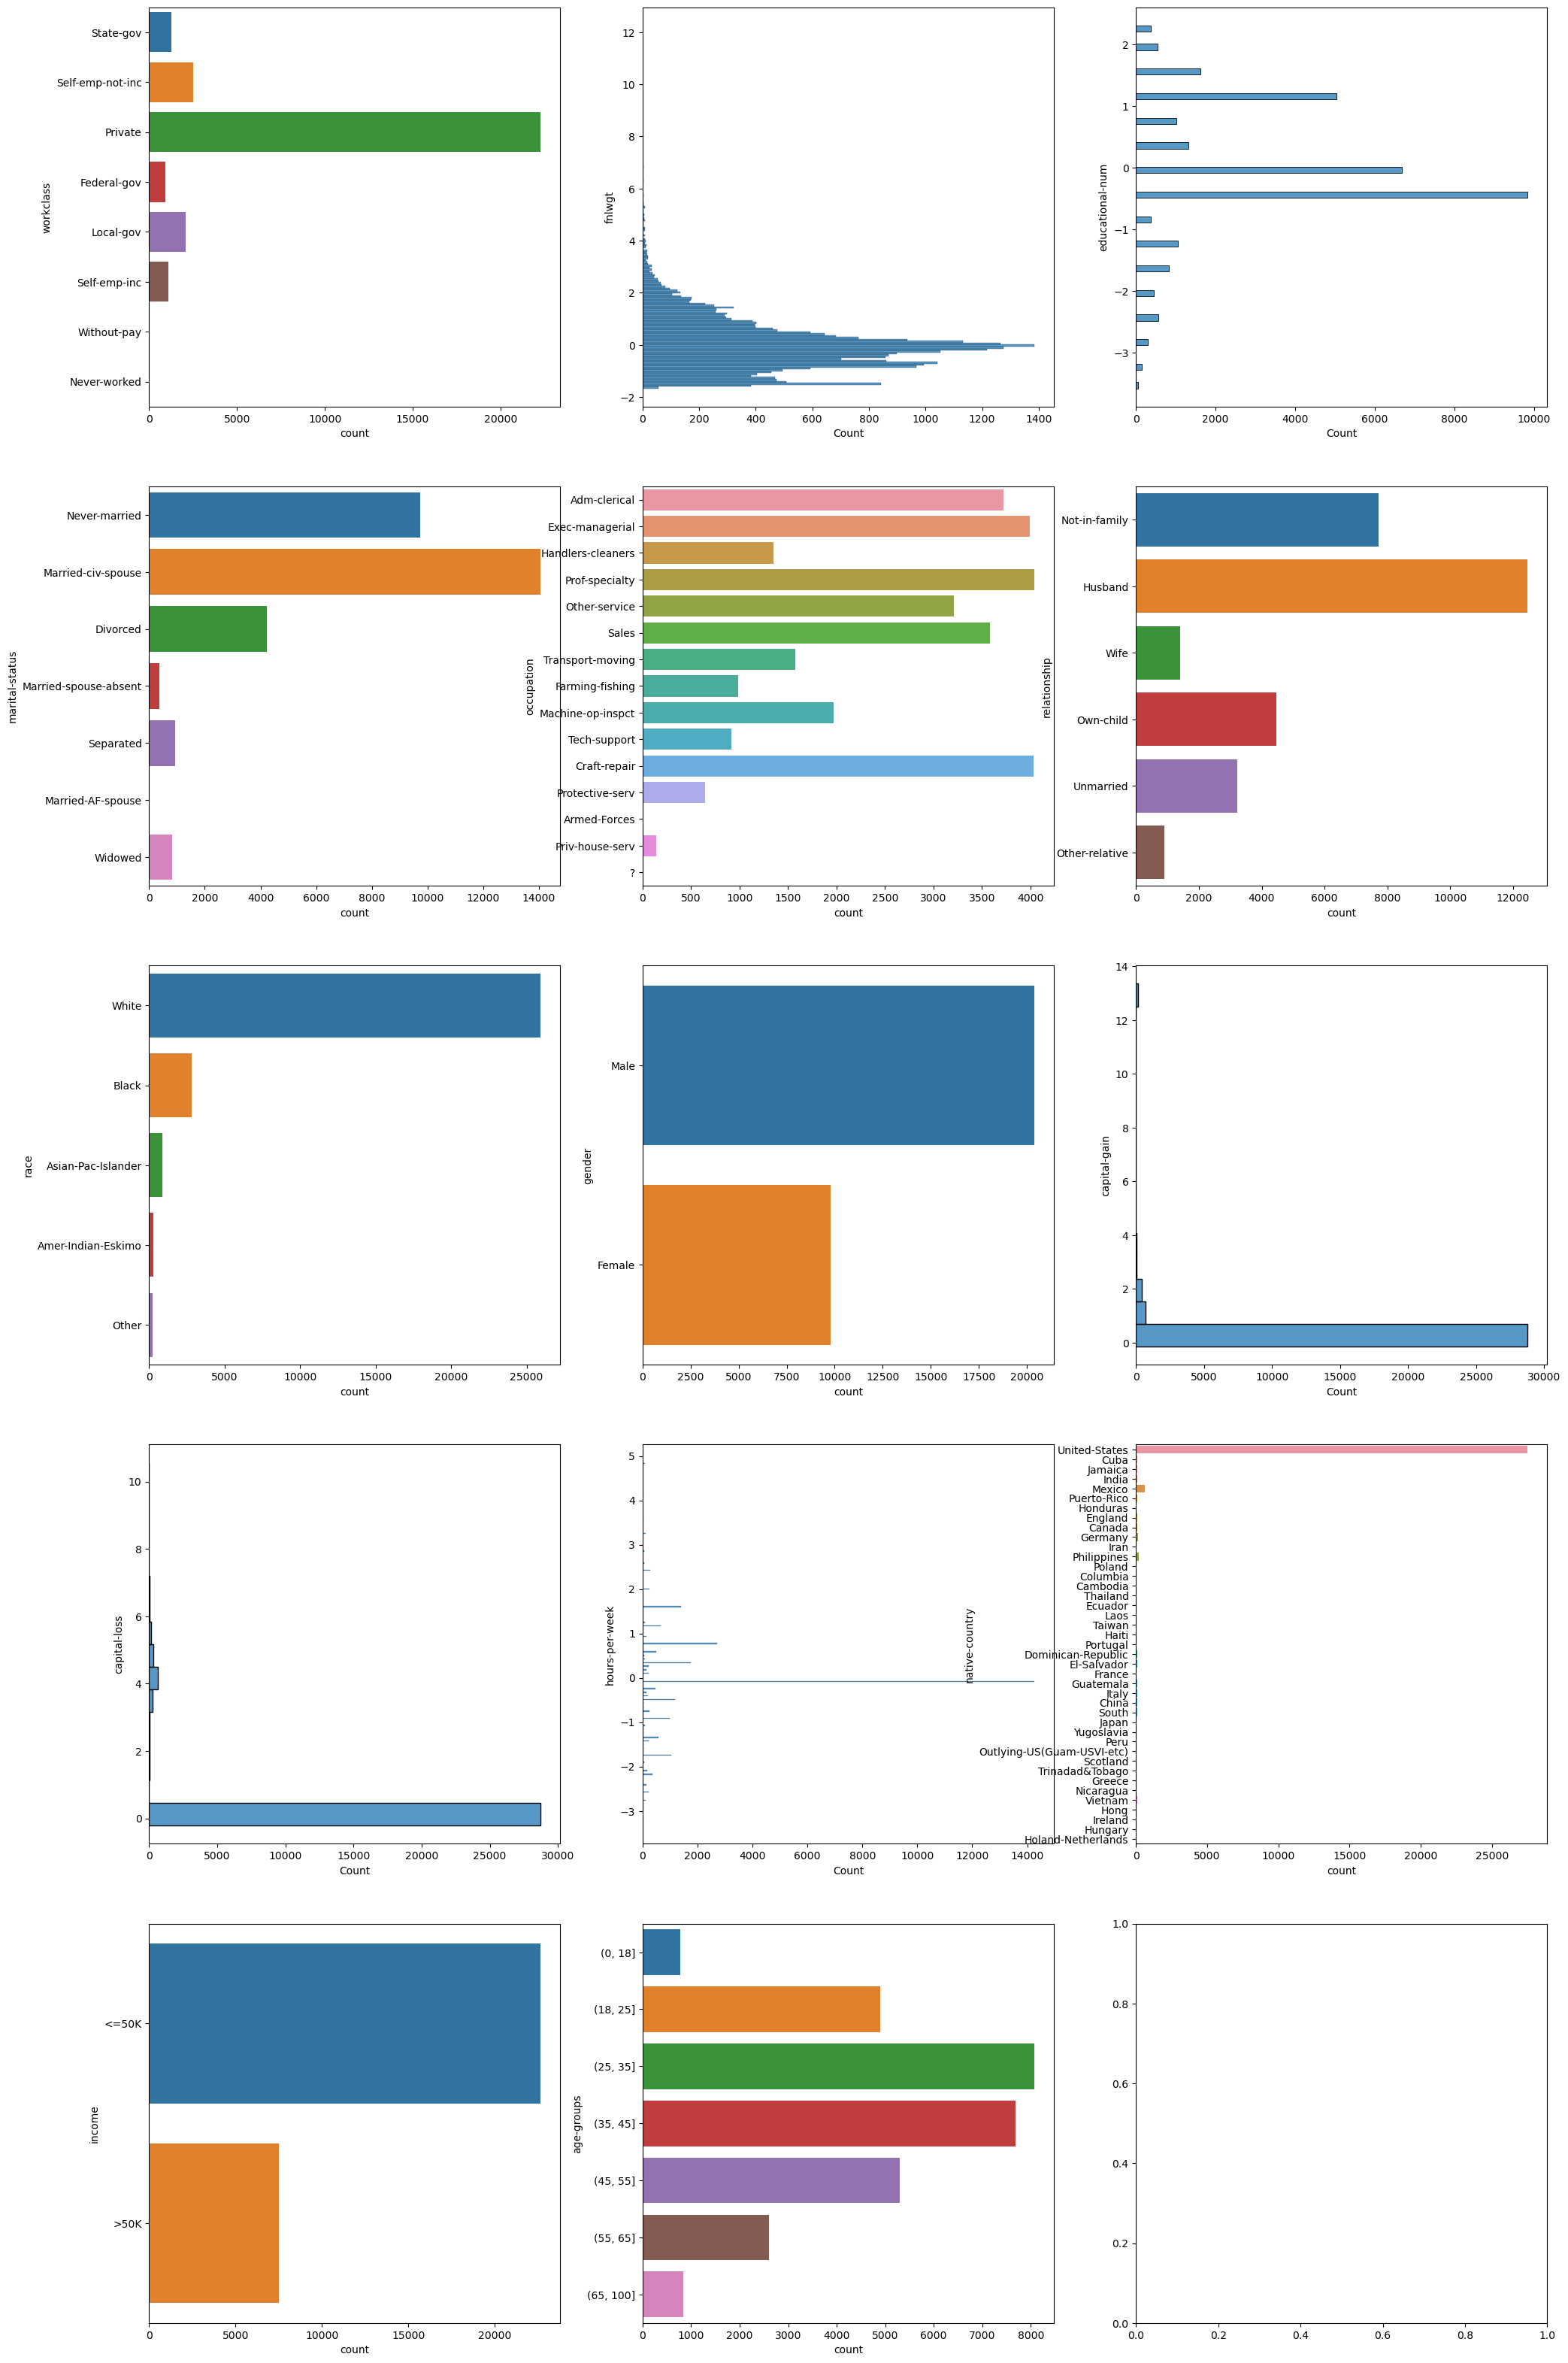

In [33]:
fig, axs = plt.subplots(5, 3, figsize=(24, 40))
for ax, c in zip(axs.flatten(), columns):
    if c in cat_cols:
        sns.countplot(data=adults_data, y=c, ax=ax)
        #new_labels = [x.get_text()[:12] for x in ax.get_yticklabels()]
        #ax.set_yticklabels(new_labels)
    else:
        sns.histplot(adults_data, y=c, ax=ax)

<AxesSubplot: xlabel='fnlwgt', ylabel='Count'>

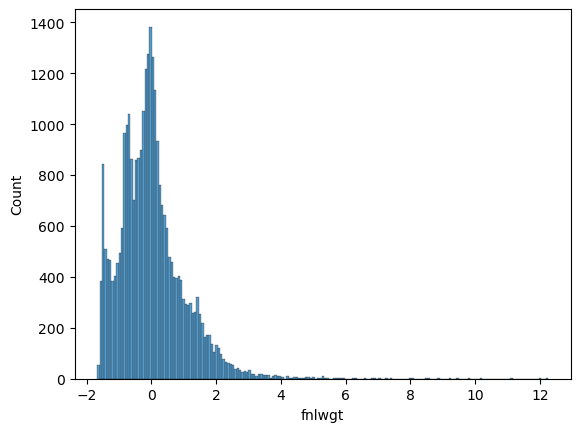

In [26]:
# Plot distributions of columns
sns.histplot(df["fnlwgt"])

<AxesSubplot: xlabel='capital-gain', ylabel='Count'>

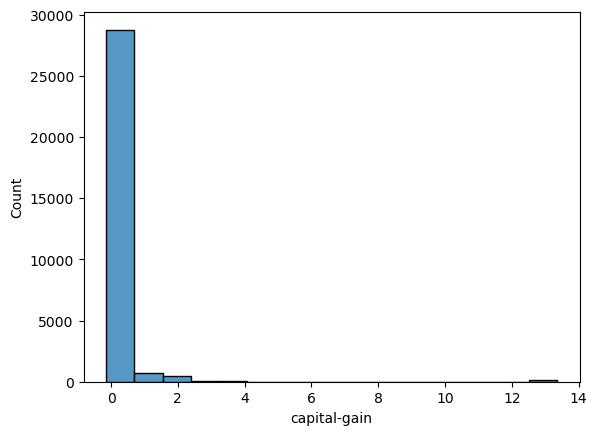

In [27]:
sns.histplot(df["capital-gain"])

<AxesSubplot: xlabel='capital-loss', ylabel='Count'>

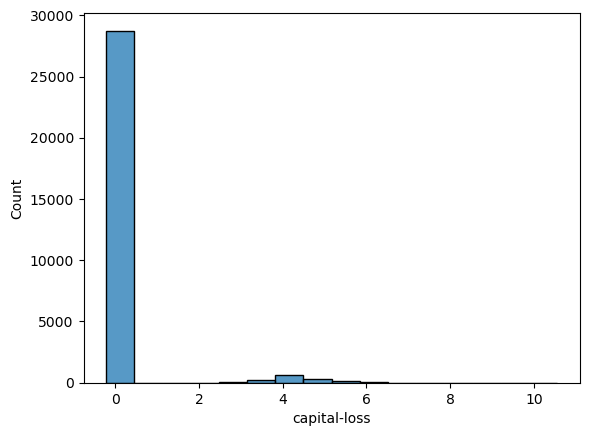

In [28]:
sns.histplot(df["capital-loss"])

<AxesSubplot: xlabel='hours-per-week', ylabel='Count'>

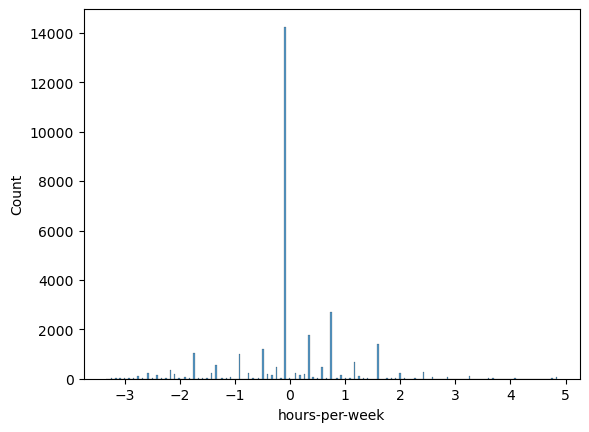

In [29]:
sns.histplot(df["hours-per-week"])

Label encode your categorical columns and print label encodings for each variable

In [ ]:
# Label encoding of categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(cat_cols)

# Print label encodings for each variable


In [38]:
from sklearn.preprocessing import LabelEncoder
df_enc = adults_data.copy()
label_encs = {c: LabelEncoder() for c in cat_cols}
for c in cat_cols:
    df_enc[c] = label_encs[c].fit_transform(df_enc[c])
    
# Print label encodings for each variable
for c, enc in label_encs.items():
    print(c)
    for i, l in enumerate(enc.classes_):
        print(i, l)
    print(" ")

age-groups
0 (0, 18]
1 (18, 25]
2 (25, 35]
3 (35, 45]
4 (45, 55]
5 (55, 65]
6 (65, 100]
 
gender
0 Female
1 Male
 
income
0 <=50K
1 >50K
 
marital-status
0 Divorced
1 Married-AF-spouse
2 Married-civ-spouse
3 Married-spouse-absent
4 Never-married
5 Separated
6 Widowed
 
native-country
0 Cambodia
1 Canada
2 China
3 Columbia
4 Cuba
5 Dominican-Republic
6 Ecuador
7 El-Salvador
8 England
9 France
10 Germany
11 Greece
12 Guatemala
13 Haiti
14 Holand-Netherlands
15 Honduras
16 Hong
17 Hungary
18 India
19 Iran
20 Ireland
21 Italy
22 Jamaica
23 Japan
24 Laos
25 Mexico
26 Nicaragua
27 Outlying-US(Guam-USVI-etc)
28 Peru
29 Philippines
30 Poland
31 Portugal
32 Puerto-Rico
33 Scotland
34 South
35 Taiwan
36 Thailand
37 Trinadad&Tobago
38 United-States
39 Vietnam
40 Yugoslavia
 
occupation
0 ?
1 Adm-clerical
2 Armed-Forces
3 Craft-repair
4 Exec-managerial
5 Farming-fishing
6 Handlers-cleaners
7 Machine-op-inspct
8 Other-service
9 Priv-house-serv
10 Prof-specialty
11 Protective-serv
12 Sales
13 Tech-s

Plot heatmap of cross correlations

Hint: lookup [Seaborn heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) and [pairwise correlation of columns](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)

Compute the correlation of each column with the target column 'income'

income             1.000000
educational-num    0.335344
relationship       0.251084
age-groups         0.246777
hours-per-week     0.229545
capital-gain       0.221207
gender             0.216656
marital-status     0.193537
capital-loss       0.150076
race               0.071684
occupation         0.051788
native-country     0.023232
fnlwgt             0.009002
workclass          0.000111
dtype: float64


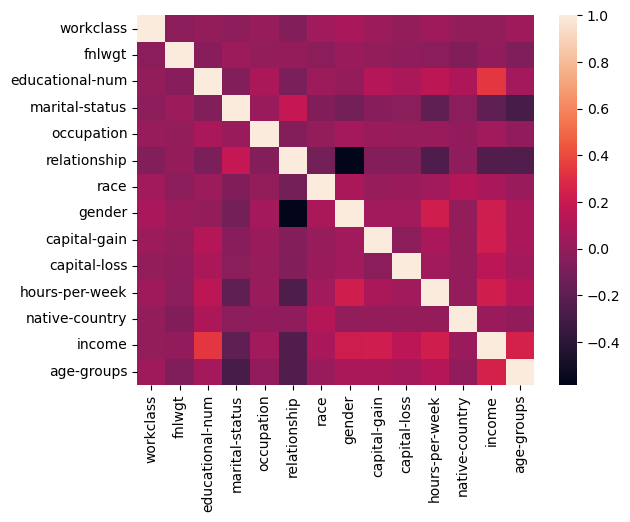

In [41]:
# Heatmap of cross correlations
sns.heatmap(df_enc.corr())

# correlation of columns with target 'income' (print them)
correlations = df_enc.corrwith(df_enc["income"]).abs().sort_values(ascending=False)
print(correlations)

Provide a pairplot of columns where the correlation with 'income' is higher than 0.1:


* Hint: See [Plot pairwise relationships in a dataset](https://seaborn.pydata.org/generated/seaborn.pairplot.html)
* Hint: Subsample the data for plotting (otherwise it will take forever to render), you can use 1000 random samples
* Hint: Set hue='income' in sns.pairplot




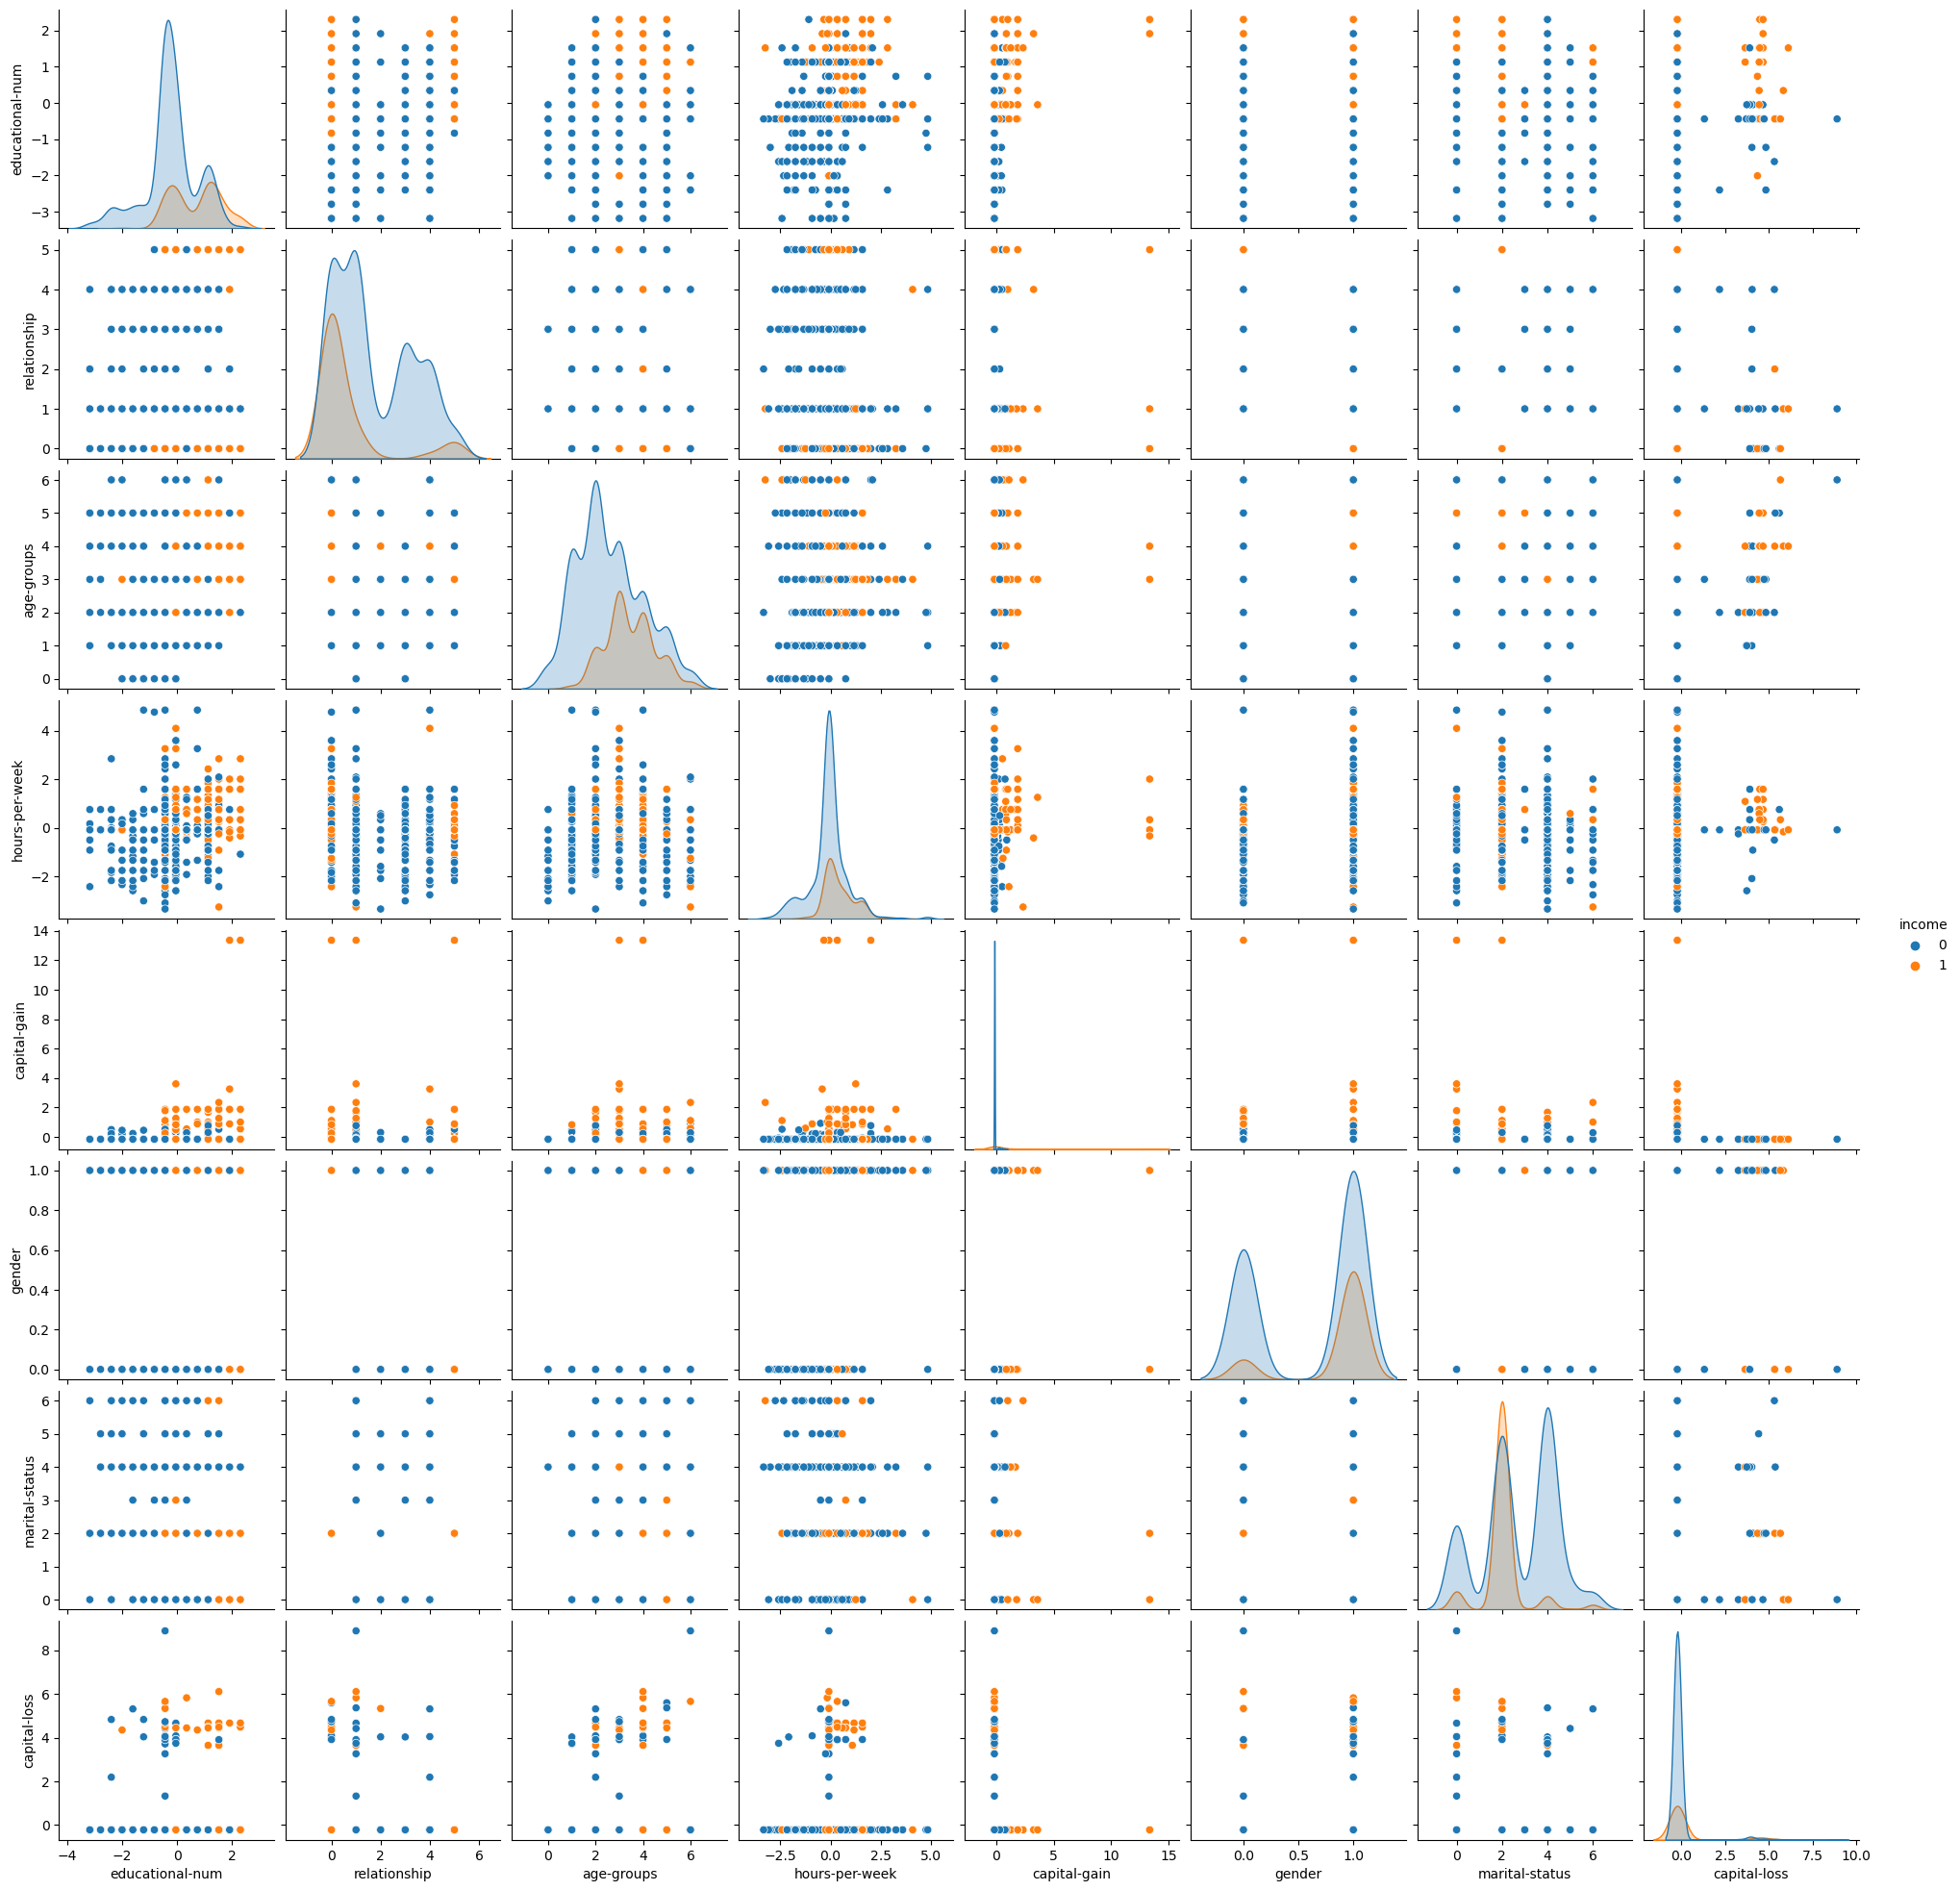

In [44]:
corr_cols = correlations[correlations > .1].index
sns.pairplot(df_enc[corr_cols].sample(1000, axis=0), hue="income")

In [ ]:
# Pairplot of columns correlated with income


Do a [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) of all categorical columns.  
Hint: See [pandas.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html).
* Print the first five rows of your new dataframe.

In [46]:
# One-hot encoding
df = pd.get_dummies(data=adults_data, columns=cat_cols)
df.head()

,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,"age-groups_(0, 18]","age-groups_(18, 25]","age-groups_(25, 35]","age-groups_(35, 45]","age-groups_(45, 55]",...,relationship_Unmarried,relationship_Wife,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,-1.062799,1.129057,0.146143,-0.218559,-0.077479,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,-1.007949,1.129057,-0.147427,-0.218559,-2.330892,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.244614,-0.439452,-0.147427,-0.218559,-0.077479,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0.425160,-1.223706,-0.147427,-0.218559,-0.077479,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,1.406576,1.129057,-0.147427,-0.218559,-0.077479,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0


Split the data into trainset, valset (1000 samples) and testset (10000 samples). Print the shape of your training, validation and test data. 

In [47]:
# Split the data into trainset, valset (1000 samples) and testset (10000 samples)
df_train_, df_test = train_test_split(df, test_size=10000)
df_train, df_val = train_test_split(df_train_, test_size=1000)
print(df_train.shape, df_val.shape, df_test.shape)

(19169, 98) (1000, 98) (10000, 98)


Write a function that splits the dataframe into X,Y, where Y can be any of the (possibly one-hot encoded) columns 

In [48]:
# Write a function thats splits the dataframe into X,Y, where Y can be any column
def split_xy(df, colname):
    y_cols = [c for c in df.columns if c.startswith(colname)]
    x_cols = np.setdiff1d(df.columns, y_cols)
    X = df[x_cols]
    Y = df[y_cols]
    return X, Y

X, Y = split_xy(df_train, 'income')
print(X.shape, Y.shape) 

(19169, 96) (19169, 2)


Write and train a linear classifier with tensorflow keras to predict 'income'


*   Loss: CategoricalCrossentropy





In [50]:
# Train a linear classifier to predict 'income'
def make_linear_mdl(input_shape=(96), n_out=1):
    inx = Input(input_shape)
    x = layers.Dense(n_out, activation=None)(inx)
    return Model(inx, x)

mdl = make_linear_mdl(n_out=2)
loss = losses.CategoricalCrossentropy(from_logits=True)
opt = optimizers.Nadam(learning_rate=5e-3)

mdl.compile(loss=loss,
            optimizer=opt,
            metrics=["accuracy"],
           )
trainset = tf.data.Dataset.from_tensor_slices((X, Y)).batch(256)
valset = tf.data.Dataset.from_tensor_slices(split_xy(df_val, "income")).batch(1000)


Metal device set to: Apple M1 Pro


2022-11-20 12:20:25.184707: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-20 12:20:25.185125: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [51]:
hist = mdl.fit(trainset, validation_data=valset, epochs=50)

Epoch 1/50


2022-11-20 12:20:54.937836: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-20 12:20:54.938125: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - 2s 13ms/step - loss: 0.4306 - accuracy: 0.8017 - val_loss: 0.3523 - val_accuracy: 0.8360
Epoch 2/50
11/75 [===>..........................] - ETA: 0s - loss: 0.3528 - accuracy: 0.8349

2022-11-20 12:20:56.280857: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - 1s 11ms/step - loss: 0.3436 - accuracy: 0.8405 - val_loss: 0.3236 - val_accuracy: 0.8570
Epoch 3/50
75/75 [==============================] - 1s 11ms/step - loss: 0.3287 - accuracy: 0.8462 - val_loss: 0.3145 - val_accuracy: 0.8610
Epoch 4/50
75/75 [==============================] - 1s 11ms/step - loss: 0.3226 - accuracy: 0.8486 - val_loss: 0.3103 - val_accuracy: 0.8580
Epoch 5/50
75/75 [==============================] - 1s 11ms/step - loss: 0.3195 - accuracy: 0.8497 - val_loss: 0.3081 - val_accuracy: 0.8570
Epoch 6/50
75/75 [==============================] - 1s 11ms/step - loss: 0.3178 - accuracy: 0.8512 - val_loss: 0.3069 - val_accuracy: 0.8580
Epoch 7/50
75/75 [==============================] - 1s 11ms/step - loss: 0.3168 - accuracy: 0.8510 - val_loss: 0.3061 - val_accuracy: 0.8600
Epoch 8/50
75/75 [==============================] - 1s 11ms/step - loss: 0.3162 - accuracy: 0.8516 - val_loss: 0.3056 - val_accuracy: 0.8600
Epoch 9/50
75/75 [======

Print the classification report and confusion matrix 

In [52]:
# Classification report + confusion matrix
Xtest, Ytest_ = split_xy(df_test, "income")
Ytest = tf.argmax(Ytest_, axis=-1)

Ypred = tf.argmax(tf.nn.softmax(mdl.predict(Xtest)), axis=-1)
print(confusion_matrix(Ytest, Ypred))
print(classification_report(Ytest, Ypred))

 95/313 [========>.....................] - ETA: 0s

2022-11-20 12:23:37.981642: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step
[[6890  603]
 [ 930 1577]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7493
           1       0.72      0.63      0.67      2507

    accuracy                           0.85     10000
   macro avg       0.80      0.77      0.79     10000
weighted avg       0.84      0.85      0.84     10000



* Now try some other models such as K-nearest neighbors, Random Forest classifier, and Support Vector Machine (code for importing the classifiers is given below)
* Print the classification report and confusion matrix of each classifier 

In [71]:
# Try out non-linear models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

Ytrain = tf.argmax(Y, axis=1)
clfs = [KNeighborsClassifier(23), RandomForestClassifier(n_estimators=1000), SVC()]
for clf in clfs:
    print(clf.__class__.__name__)
    clf.fit(X, Ytrain)
    Ypred = clf.predict(Xtest)
    print(confusion_matrix(Ytest, Ypred))
    print(classification_report(Ytest, Ypred))

KNeighborsClassifier
[[6845  648]
 [ 980 1527]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      7493
           1       0.70      0.61      0.65      2507

    accuracy                           0.84     10000
   macro avg       0.79      0.76      0.77     10000
weighted avg       0.83      0.84      0.83     10000

RandomForestClassifier
[[6819  674]
 [ 916 1591]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      7493
           1       0.70      0.63      0.67      2507

    accuracy                           0.84     10000
   macro avg       0.79      0.77      0.78     10000
weighted avg       0.84      0.84      0.84     10000

SVC
[[7012  481]
 [ 996 1511]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.90      7493
           1       0.76      0.60      0.67      2507

    accuracy                           0.85     10000

Train a neural network for 50 epochs with:
* An input layer
* Two dense layers, where between the two dense layers is a dropout layer
* Input -> Dense -> Dropout-> Dense

* Loss: CategoricalCrossentropy
* Metrics: 'accuracy'

In [73]:
# Try out non-linear NN
def make_dense_clf(input_shape=(96), n_hidden=256, n_out=2):
    inx = Input(input_shape)
    x = layers.Dense(n_hidden, activation="relu")(inx)
    x = layers.Dropout(.4)(x)
    x = layers.Dense(n_out, activation=None)(x)
    return Model(inx, x)

nn = make_dense_clf()
nn.compile(loss=losses.CategoricalCrossentropy(from_logits=True),
           optimizer=optimizers.Nadam(learning_rate=5e-3),
           metrics="accuracy",
          )

hist2 = nn.fit(trainset,
               validation_data=valset,
               epochs=50,
              )

Epoch 1/50


2022-11-20 12:38:29.883899: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - 2s 18ms/step - loss: 0.3443 - accuracy: 0.8411 - val_loss: 0.3123 - val_accuracy: 0.8590
Epoch 2/50
 9/75 [==>...........................] - ETA: 0s - loss: 0.3127 - accuracy: 0.8546

2022-11-20 12:38:31.744412: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - 1s 14ms/step - loss: 0.3076 - accuracy: 0.8558 - val_loss: 0.3113 - val_accuracy: 0.8620
Epoch 3/50
75/75 [==============================] - 1s 14ms/step - loss: 0.2956 - accuracy: 0.8621 - val_loss: 0.3114 - val_accuracy: 0.8650
Epoch 4/50
75/75 [==============================] - 1s 14ms/step - loss: 0.2840 - accuracy: 0.8697 - val_loss: 0.3149 - val_accuracy: 0.8600
Epoch 5/50
75/75 [==============================] - 1s 14ms/step - loss: 0.2718 - accuracy: 0.8756 - val_loss: 0.3160 - val_accuracy: 0.8670
Epoch 6/50
75/75 [==============================] - 1s 14ms/step - loss: 0.2591 - accuracy: 0.8809 - val_loss: 0.3182 - val_accuracy: 0.8620
Epoch 7/50
75/75 [==============================] - 1s 14ms/step - loss: 0.2462 - accuracy: 0.8889 - val_loss: 0.3227 - val_accuracy: 0.8640
Epoch 8/50
75/75 [==============================] - 1s 14ms/step - loss: 0.2337 - accuracy: 0.8948 - val_loss: 0.3298 - val_accuracy: 0.8610
Epoch 9/50
75/75 [======

Print the classification report and confusion matrix 

In [74]:
Ypred = tf.argmax(tf.nn.softmax(nn.predict(Xtest)), axis=-1)
print(confusion_matrix(Ytest, Ypred))
print(classification_report(Ytest, Ypred))

 86/313 [=======>......................] - ETA: 0s

2022-11-20 12:39:35.783445: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step
[[6719  774]
 [ 850 1657]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      7493
           1       0.68      0.66      0.67      2507

    accuracy                           0.84     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.84      0.84      0.84     10000



Did the non-linear classifiers improve over the linear classifier? Interprete the results.